# TASK-2 PREDICTION USING UNSUPERVISED ML (K-means clustering)

**- by sindhura gundubogula** 

From the given 'Iris' Dataset, Predict the optimum number of clusters and represent it visually.

Data is available at the URL: https://bit.ly/3kXTdox

**STEP-1 import all required python libraries**

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

**STEP-2 Load the dataset**

In [258]:
iris = pd.read_csv("Iris.csv")
iris.set_index("Id", inplace = True)

In [259]:
iris 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


**STEP-2 Data preprocessing**

**Checking missing values**

In [260]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


We can see there are no null values 1.e, no missing data

**Checking inconsistent data**

In [261]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

No inconsistent data is found. 

**Analyzing the data**

Before performing the clustering, Lets analyze the data by ploting ascatter plot.

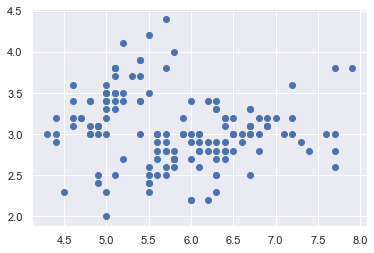

In [262]:
# Visualising the data - On the first two columns
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'])
plt.show()

We can Observe 2 clusters as of now

**STEP-3 Selecting features to perform K-MEANS CLUSTERING**


**1) To perform clustering based on numerical data**

In [194]:

x = iris.iloc[:, 0:2] #(1) clustering based on "SepalLengthCm and SepalWidthCm"
y = iris.iloc[:, 2:4] #(2) clustering based on "petalLengthCm and petalWidthCm"
z = iris.iloc[:, 0:4] #(3) clustering based on "SepalLengthCm,SepalWidthCm,petalLengthCm and petalWidthCm"


In [263]:
x

,SepalLengthCm,SepalWidthCm
Id,,
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
...,...,...
146,6.7,3.0
147,6.3,2.5
148,6.5,3.0


In [264]:
y

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0


In [265]:
z

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


**2)  To perform  clustering based on categirical data**

In [266]:

iris_cat = iris.copy()
iris_cat['Species'] = iris_cat['Species'].map({'Iris-setosa' : 0, 'Iris-versicolor': 1, 'Iris-virginica':2 })
iris_cat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [267]:
a = iris_cat.iloc[:, 4:]
a

,Species
Id,
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2


**3)  To perform  clustering based on both numerical && categirical data**

In [268]:
b = iris_cat.iloc[:, 2:]

In [269]:
b

,PetalLengthCm,PetalWidthCm,Species
Id,,,
1,1.4,0.2,0
2,1.4,0.2,0
3,1.3,0.2,0
4,1.5,0.2,0
5,1.4,0.2,0
...,...,...,...
146,5.2,2.3,2
147,5.0,1.9,2
148,5.2,2.0,2


From the above created variables (x,y,z,a,b), we can select  any one of the based on our requirements where

**x** has the features to perform **clustering based on "SepalLengthCm and SepalWidthCm"** (numerical data)

**y** has the features to perform **clustering based on "PetalLengthCm and PetalWidthCm"** (numerical data)

**z** has the features to perform **clustering based on SepalLengthCm,SepalWidthCm,petalLengthCm and petalWidthCm** (numerical data)

**a** has the features to perform **clustering based on Species**(single feature and categorical data)

**b** has the features to perform **clustering based on "PetalLengthCm,PetalWidthCm and Species"** (both numerical and categorical data)

**STEP-4 PERFORM CLUSTERING**

In Kmeans(n), "n" is the number of clusters required.

In [270]:
kmeans = KMeans(2)

In [271]:
kmeans.fit(x)

KMeans(n_clusters=2)

**clustering results**

In [272]:
Identified_clusters = kmeans.fit_predict(x)
Identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [273]:
iris_with_clusters = iris.copy()
iris_with_clusters['cluster'] = Identified_clusters
iris_with_clusters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0
147,6.3,2.5,5.0,1.9,Iris-virginica,0
148,6.5,3.0,5.2,2.0,Iris-virginica,0


**Visualizing results**

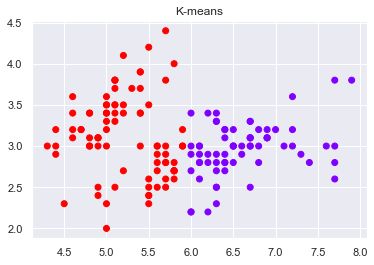

In [274]:
# Visualising the clusters - On the first two columns
plt.scatter(iris_with_clusters['SepalLengthCm'],iris_with_clusters['SepalWidthCm'],c=iris_with_clusters['cluster'],cmap='rainbow' )
plt.title('K-means')

plt.show()

This solution of 2 clusters might not look satisfactory, So in order to find out optimum number of clusters we can use **THE ELBOW METHOD**

**STEP-5 THE Elbow method(Choosing Number of clusters)**

Ploting graph between **WCSS**(Within-cluster sum of squares) against **Number of clusters**, We can choose the optimun number of clusters

**calculating WCSS**

In [275]:
wcss=[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss    

[130.18093333333334,
 57.98240604207882,
 37.1237021276596,
 27.93833818565089,
 21.02480460317509,
 17.515727185611087,
 14.692192485856552,
 12.756653846153847,
 11.184270978064088]

We can observe that the values are decreasing gradually. In order to get clear picture lets plot these against number of clusters

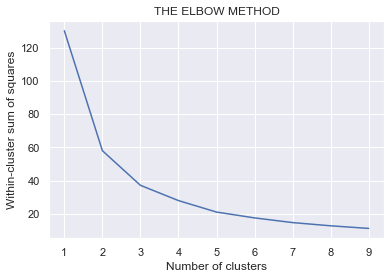

In [276]:
plt.plot(range(1,10),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

Wfrom the above graph, we can observe almost 4 clear elbow  tips at 2,3,4 and 5. This shows that after 5, the solution might not be a optimal one. 

**Exploring different clustering solutions and selecting optimum number of clusters**

In [277]:
kmeans_new = KMeans(3)
kmeans_new.fit(x)
clusters_new = x.copy()
clusters_new['cluster_predicted'] = kmeans_new.fit_predict(x)

In [278]:
clusters_new

,SepalLengthCm,SepalWidthCm,cluster_predicted
Id,,,
1,5.1,3.5,0
2,4.9,3.0,0
3,4.7,3.2,0
4,4.6,3.1,0
5,5.0,3.6,0
...,...,...,...
146,6.7,3.0,1
147,6.3,2.5,2
148,6.5,3.0,1


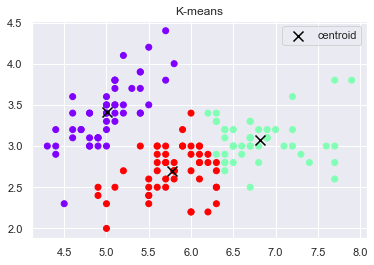

In [279]:

# Visualising the clusters - On the first two columns

plt.scatter(clusters_new['SepalLengthCm'],clusters_new['SepalWidthCm'],c=clusters_new['cluster_predicted'],cmap='rainbow' )
plt.title('K-means')

#plotting centroids
plt.scatter(kmeans_new.cluster_centers_[:, 0], kmeans_new.cluster_centers_[:, 1], marker='x', s=100,c='black', label='centroid')

plt.legend()
plt.show()

After exploring different solutions, For selected input features **"SepalLengthCM && SepalWidthCm"** I found **3-cluster** solution as optimal. 

With our well parameterized code we can play by using different inputs (such as selecting different features,trying different number of clusters) and analyze our data in different aspects 

 ** <<**end of the algorithm**>> **